## Модуль 1. Проектирование API: Введение в API

## Цель

Научиться работать с готовой документацией OpenAPI

## Введение

Программисты любят устраивать сюрпризы и ломать эндпоинты без предупреждения. Если ваш коллега сидит напротив вас и вся ваша система состоит из пары эндпоинтов - это не проблема.

А если система состоит из пары **тысяч** эндпоинтов, управляемых разными юрлицами ?

В такой ситуации нам нужно по документации ю написать автоматические тесты.

In [ ]:
!pip install fastapi uvicorn[standard] nest-asyncio  requests pytest -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 21.9 MB/s eta 0:00:00


In [ ]:
%%writefile main.py

from fastapi import FastAPI, HTTPException, Request, Response, status, Header, Cookie
from fastapi.responses import JSONResponse
from pydantic import BaseModel
import uvicorn
import threading
import requests
import time


# Create FastAPI app
app = FastAPI(title="Demo API", version="1.0",
              description="Illustrates HTTP methods, status codes, headers, cookies, JSON, REST, Swagger docs")

# In-memory “database”
db = {}


# 3. Data Models


class Item(BaseModel):
    name: str
    description: str = None
    price: float

class ItemConfidentioal(BaseModel):
    name: str
    description: str = None

# 4. REST Endpoints

# GET /items — list all items
@app.get("/items", response_model=list[Item])
def list_items():
    return list(db.values())

# POST /items — create an item
@app.post("/items", status_code=status.HTTP_201_CREATED, response_model=ItemConfidentioal)
def create_item(item: Item):
    db[len(db) + 1] = item
    return item

# GET /items/{item_id} — retrieve single item or 404
@app.get("/items/{item_id}", response_model=Item)
def get_item(item_id: int):
    if item_id not in db:
        raise HTTPException(status_code=404, detail="Item not found")
    return db[item_id]

# PUT /items/{item_id} — update or 404
@app.put("/items/{item_id}", response_model=Item)
def update_item(item_id: int, item: Item):
    if item_id not in db:
        raise HTTPException(status_code=404, detail="Item not found")
    db[item_id] = item
    return item

# DELETE /items/{item_id} — delete or 404
@app.delete("/items/{item_id}", status_code=status.HTTP_204_NO_CONTENT)
def delete_item(item_id: int):
    if item_id not in db:
        raise HTTPException(status_code=404, detail="Item not found")
    del db[item_id]
    return Response(status_code=status.HTTP_204_NO_CONTENT)

# Demonstrate headers, cookies & sessions
@app.get("/info")
def info(user_agent: str = Header(None), session_id: str = Cookie(None)):
    # User-Agent header
    # session_id cookie
    return {"user_agent": user_agent, "session_id": session_id}

@app.post("/login")
def login(response: Response):
    # In real life check credentials...
    session_token = "abc123session"
    response.set_cookie(key="session_id", value=session_token, httponly=True)
    return {"message": "Logged in", "session_id": session_token}


Writing main.py


%%html

Поскольку код коллаба выполняется внутри виртуальной машины у которой нет внешнего IP-адреса вам потребуется создать тоннель чтобы получить внешний IP-адрес.

Зарегистрируйтесь в личном кабинете <a href="https://xtunnel.ru/">https://xtunnel.ru/</a> и скопируйте бесплатную лицензию (секретный ключ API)

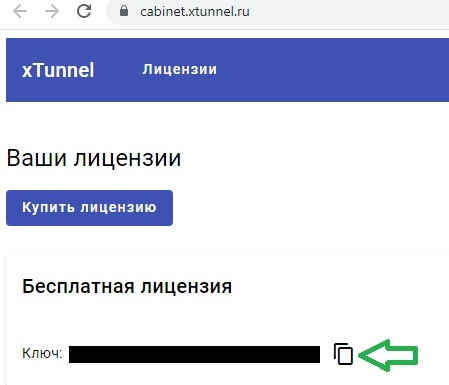

Нажмите на значок ключа (1) на левой панели меню коллаба, вставьте скопированный секретный ключ API в ячейку (4), впишите название ключа XTUNNEL_API_KEY в ячейку (3) и разрешите доступ к этому ключу (2)

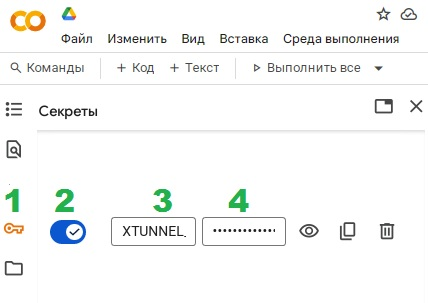

In [ ]:
import requests, os
from google.colab import userdata
os.environ["XTUNNEL_API_KEY"]=userdata.get('XTUNNEL_API_KEY') #<- пароли в коде не храним

In [ ]:
!wget -O xt.zip https://github.com/xtunnel-dev/xtunnel-binaries/raw/refs/heads/main/1.0.20/xtunnel.linux-x64.1.0.20.zip
!unzip xt.zip
!./xtunnel register $XTUNNEL_API_KEY

--2025-10-14 15:23:01--  https://github.com/xtunnel-dev/xtunnel-binaries/raw/refs/heads/main/1.0.20/xtunnel.linux-x64.1.0.20.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xtunnel-dev/xtunnel-binaries/refs/heads/main/1.0.20/xtunnel.linux-x64.1.0.20.zip [following]
--2025-10-14 15:23:01--  https://raw.githubusercontent.com/xtunnel-dev/xtunnel-binaries/refs/heads/main/1.0.20/xtunnel.linux-x64.1.0.20.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39613803 (38M) [application/zip]
Saving to: ‘xt.zip’

xt.zip              100%[===================>]  37.78M  73.5MB/s    in 0.5s    

2025-10

In [ ]:
# 5. Run the Server in Background
print(f"Скопируйте адрес Public address ниже, вставьте его в адресную строку браузера, добавьте путь /docs, нажмите Enter")
!sleep 5 & uvicorn main:app --reload --port 8090 --host 0.0.0.0 & ./xtunnel http 8090 & wait

Скопируйте адрес Public address ниже, вставьте его в адресную строку браузера, добавьте путь /docs, нажмите Enter
=INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8090 (Press CTRL+C to quit)
INFO:     Started reloader process [383] using WatchFiles
Status: Connecting
Public address: 
Target address: http://localhost:8090


Press Ctrl+C to exit
INFO:     Started server process [399]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
Status: Connecting
Public address: https://7419e76f-e15e-4ed1-80c1-9fab2132623f.tunnel4.com
Public address: http://7419e76f-e15e-4ed1-80c1-9fab2132623f.tunnel4.com
Target address: http://localhost:8090


Press Ctrl+C to exit
Status: Connected
Public address: https://7419e76f-e15e-4ed1-80c1-9fab2132623f.tunnel4.com
Public address: http://7419e76f-e15e-4ed1-80c1-9fab2132623f.tunnel4.com
Target address: http://localhost:8090


Press Ctrl+C to exit
Status: Connected


### Тесты ? Да, обязательно !!!

Не желаете тратить время на поиск багов - используйте [git bisect](https://git-scm.com/docs/git-bisect) !

Чтобы git bisect заработал нам нужны тесты.

In [ ]:
!pip install pytest -qqq

In [ ]:
%%writefile test_connectity.py
import sys
import requests
import pytest
import logging
logger = logging.getLogger(__name__)


base = "http://52fe9105-7e5c-4fb4-be58-ee0c289dac5c.tunnel4.com"


def test_post_name():
  r = requests.post(f"{base}/items", json={"name":"Pen","description":"Blue ink","price":1.2})
  logger.info("POST /items →"+str(r.status_code)+","+r.text)
  assert r.status_code == 201

def test_post_Notebook():
  r = requests.post(f"{base}/items", json={"name":"Notebook","price":3.5})
  logger.info("POST /items →"+str(r.status_code)+","+r.text)
  assert r.status_code == 201

def test_get_items():
  r = requests.get(f"{base}/items")
  logger.info("GET /items →"+str(r.status_code)+","+r.text)
  assert r.status_code == 200

def test_get_items_1():
  r = requests.get(f"{base}/items/1")
  logger.info("GET /items/1 →"+str(r.status_code)+","+r.text)
  assert r.status_code == 200

def test_get_items_999():
  r = requests.get(f"{base}/items/999")
  logger.info("GET /items/999 →"+str(r.status_code)+","+r.text)
  assert r.status_code == 404

def test_put():
  r = requests.put(f"{base}/items/1", json={"name":"Pen","description":"Black ink","price":1.5})
  logger.info("PUT /items/1 →"+str(r.status_code)+","+r.text)
  assert r.status_code == 200

def test_delete():
  r = requests.delete(f"{base}/items/1")
  logger.info("DELETE /items/1 →"+str(r.status_code)+","+r.text)
  assert r.status_code == 204

def test_delete_non_existent():
  r = requests.delete(f"{base}/items/2")
  logger.info("DELETE /items/2 →", r.status_code)
  assert r.status_code == 204

def test_get_info():
  r = requests.get(f"{base}/info", headers={"User-Agent":"MyClient/1.0"})
  logger.info("GET /info →", r.status_code, r.json())
  assert r.status_code == 200

def test_post_login():
  r = requests.post(f"{base}/login")
  logger.info("POST /login →", r.status_code, r.cookies.get_dict())
  assert r.status_code == 200


#!pytest

In [ ]:
!pytest

## Итог

Мы научились пробрасывать тоннель на внешний IP-адрес, чтобы с нашей документацией могли ознакомиться коллеги.

Несмотря на то, что никто не любит писать тесты - тем не менее: их использование в разработке **обязательно** !